# MLP

## Table of Contents
- [Display the Number of Columns](#display-the-number-of-columns)
- [Correlation Matrix](#correlation-matrix)
- [Draw Diagram](#draw-diagram)
- [Data Preprocessing](#data-preprocessing)
- [Model Implementation](#model-implementation)
- [Model Training](#model-training)
- [Results Anallysis](#results-anallysis)
- [References](#references)

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch 
import torch.nn as nn 
import torch.optim as optim

In [26]:
df = pd.read_csv("../data/Question4.csv")

## Display the Number of Columns


In [27]:
nan_counts = df.isna().sum()
nan_counts_df = pd.DataFrame(nan_counts, columns=['NaN Counts']) 
print(tabulate(nan_counts_df, headers='keys', tablefmt='pretty'))

+---------------+------------+
|               | NaN Counts |
+---------------+------------+
|      id       |     0      |
|     date      |     0      |
|     price     |     0      |
|   bedrooms    |     0      |
|   bathrooms   |     0      |
|  sqft_living  |     0      |
|   sqft_lot    |     0      |
|    floors     |     0      |
|  waterfront   |     0      |
|     view      |     0      |
|   condition   |     0      |
|     grade     |     0      |
|  sqft_above   |     0      |
| sqft_basement |     0      |
|   yr_built    |     0      |
| yr_renovated  |     0      |
|    zipcode    |     0      |
|      lat      |     0      |
|     long      |     0      |
| sqft_living15 |     0      |
|  sqft_lot15   |     0      |
+---------------+------------+


## Correlation Matrix


In [28]:
def plot_correlation_matrix(df, exception_columns=[]): 
    numeric_fields = df.select_dtypes(include=['number']).columns.tolist() 
    numeric_fields = [col for col in numeric_fields if col not in exception_columns] 
    df_selected = df[numeric_fields] 
    corr_matrix = df_selected.corr() 
    plt.figure(figsize=(12, 8)) 
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True) 
    plt.title("Correlation Matrix Heatmap") 
    plt.show()

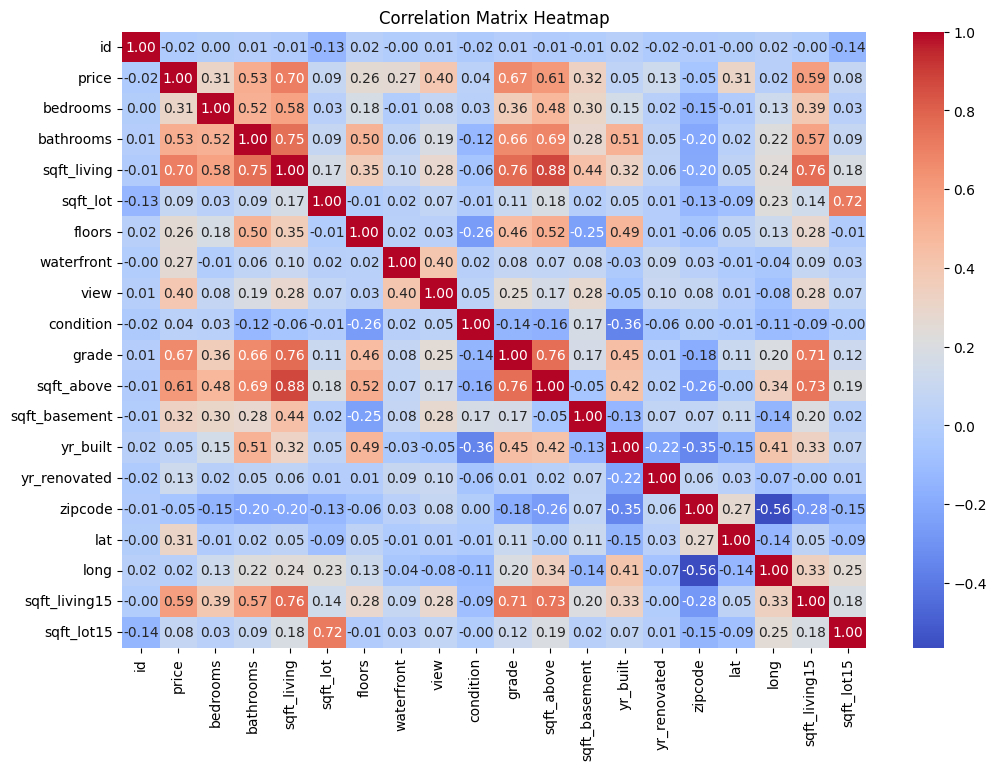

In [29]:
plot_correlation_matrix(df)

## Draw Diagram


In [30]:
def plot_distributions(df, fields, bin='auto'): 
    for field in fields: 
        if field not in df.columns: 
            raise ValueError(f"Field '{field}' is not in the DataFrame") 
        plt.figure(figsize=(10, 6)) 
        sns.histplot(df[field], kde=True, bins=bin) 
        plt.xlabel(field) 
        plt.ylabel('Frequency') 
        plt.title(f'Distribution of {field}') 
        plt.grid(True) 
        plt.show()

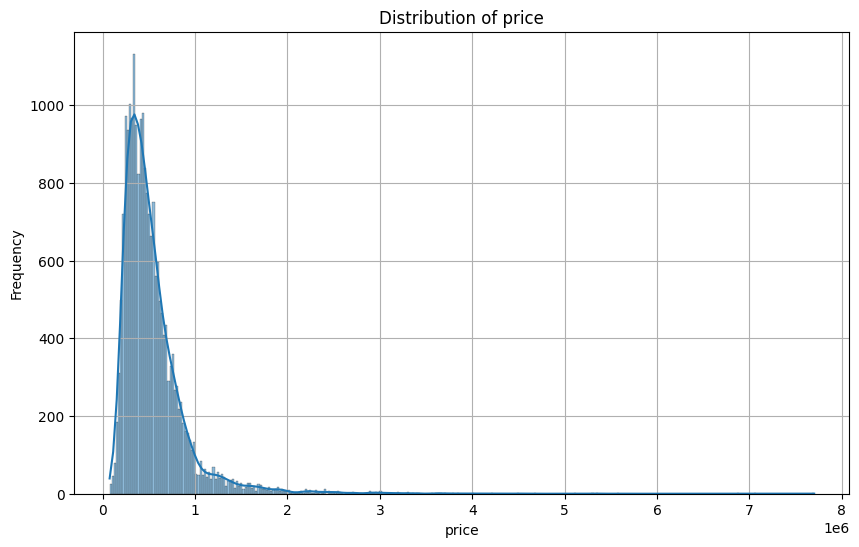

In [31]:
plot_distributions(df, ['price'], 'auto')

In [32]:
def plot_scatter(df, field1, field2): 
    if field1 not in df.columns : 
        raise ValueError(f'{field1} is not in the DataFrame') 
    elif field2 not in df.columns: 
        raise ValueError(f'{field2} is not in the DataFrame') 
    plt.figure(figsize=(10, 6)) 
    plt.scatter(df[field1], df[field2], alpha=0.8) 
    plt.xlabel(field1) 
    plt.ylabel(field2) 
    plt.title(f'Scatter Plot of {field1} vs {field2}') 
    plt.grid(True)

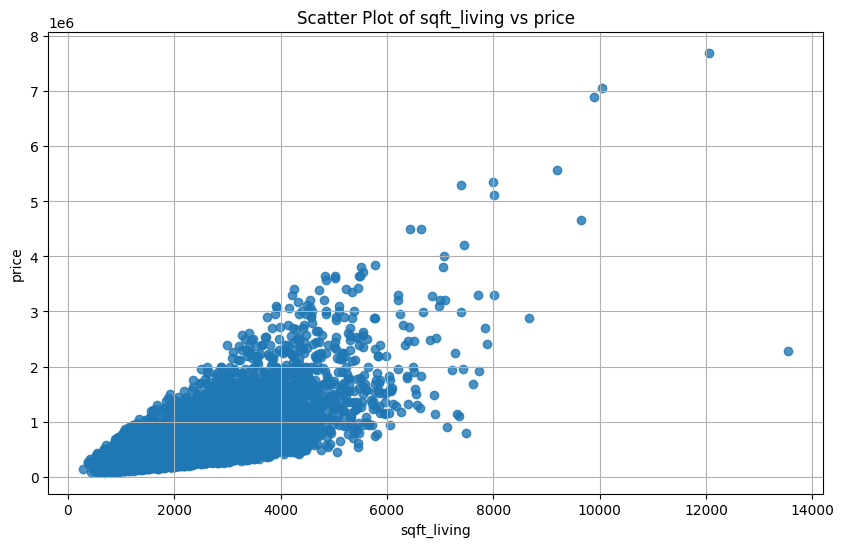

In [33]:
plot_scatter(df, 'sqft_living', 'price')

## Data Preprocessing


In [34]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [35]:
def extract_year_month(df, date_field): 
    df[date_field] = pd.to_datetime(df[date_field], format='%Y%m%dT%H%M%S') 
    df['year'] = df[date_field].dt.year 
    df['month'] = df[date_field].dt.month 
    df = df.drop(columns=[date_field], axis=1, inplace=True) 
    return

In [36]:
extract_year_month(df, 'date')

In [37]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [38]:
X = df.drop('price', axis=1)
Y = df['price']
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.25, random_state=13)

In [39]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_validation_scaled = scaler.transform(X_validation) 
y_train = y_train.values.reshape(-1, 1)
y_validation = y_validation.values.reshape(-1, 1) 
y_train_scaled = scaler.fit_transform(y_train) 
y_validation_scaled = scaler.transform(y_validation) 
X_train_scaled_df = pd.DataFrame(X_train_scaled) 
X_validation_scaled_df = pd.DataFrame(X_validation_scaled) 
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=['price']) 
y_validation_scaled_df = pd.DataFrame(y_validation_scaled, columns=['price'])

In [41]:
X_train = torch.tensor(X_train_scaled, dtype=torch.float32) 
X_validation = torch.tensor(X_validation_scaled, dtype=torch.float32) 
y_train = torch.tensor(y_train_scaled, dtype=torch.float32).view(-1, 1) 
y_validation = torch.tensor(y_validation_scaled, dtype=torch.float32).view(-1, 1)

## Model Implementation


In [59]:
class MLP_OneHidden(nn.Module): 
    def __init__(self): 
        super(MLP_OneHidden, self).__init__() 
        self.hidden = nn.Linear(X_train.shape[1], 10) 
        self.dropout = nn.Dropout(p=0.3) 
        self.output = nn.Linear(10, 1) 
    def forward(self, x): 
        x = torch.relu(self.hidden(x)) 
        x = self.dropout(x) 
        x = self.output(x) 
        return x 
    
class MLP_TwoHidden(nn.Module): 
    def __init__(self): 
        super(MLP_TwoHidden, self).__init__() 
        self.hidden1 = nn.Linear(X_train.shape[1], 10) 
        self.dropout1 = nn.Dropout(p=0.15) 
        self.hidden2 = nn.Linear(10, 10) 
        self.dropout2 = nn.Dropout(p=0.15) 
        self.output = nn.Linear(10, 1) 
    def forward(self, x): 
        x = torch.relu(self.hidden1(x)) 
        x = self.dropout1(x) 
        x = torch.relu(self.hidden2(x)) 
        x = self.dropout2(x) 
        x = self.output(x) 
        return x

## Model Training


In [60]:
def train_model(model, X_train, y_train, X_validation, y_validation, epochs=50, learning_rate=0.01, weight_decay=0.01): 
    criterion = nn.MSELoss() 
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01) 
    train_losses = [] 
    val_losses = [] 
    for epoch in range(epochs): 
        model.train() 
        optimizer.zero_grad() 
        outputs = model(X_train) 
        loss = criterion(outputs, y_train) 
        loss.backward() 
        optimizer.step() 
        train_losses.append(loss.item()) 
        model.eval() 
        val_outputs = model(X_validation) 
        val_loss = criterion(val_outputs, y_validation) 
        val_losses.append(val_loss.item()) 
        if (epoch+1) % 10 == 0: 
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}, Validation Loss: {val_loss.item():.8f}') 
    return train_losses, val_losses

In [65]:
def plot_losses(train_losses, val_losses, epochs=50):
    plt.figure(figsize=(10, 5)) 
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', alpha=0.5) 
    plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', alpha=0.5)  
    plt.xlabel('Epoch') 
    plt.ylabel('Loss') 
    plt.title('Training and Validation Loss Over Epochs') 
    plt.legend() 
    plt.show()

In [67]:
model_one_hidden = MLP_OneHidden() 
print("Training model with one hidden layer:") 
OH_TLosses, OH_VLosses = train_model(model_one_hidden, X_train, y_train, X_validation, y_validation, epochs=7500, learning_rate=0.0001) 

Training model with one hidden layer:
Epoch [10/7500], Loss: 0.17470606, Validation Loss: 0.16955727
Epoch [20/7500], Loss: 0.16559680, Validation Loss: 0.16108678
Epoch [30/7500], Loss: 0.15734416, Validation Loss: 0.15307860
Epoch [40/7500], Loss: 0.14868230, Validation Loss: 0.14552267
Epoch [50/7500], Loss: 0.14192727, Validation Loss: 0.13840833
Epoch [60/7500], Loss: 0.13549951, Validation Loss: 0.13170601
Epoch [70/7500], Loss: 0.12908910, Validation Loss: 0.12538905
Epoch [80/7500], Loss: 0.12243205, Validation Loss: 0.11943226
Epoch [90/7500], Loss: 0.11652844, Validation Loss: 0.11379722
Epoch [100/7500], Loss: 0.11116853, Validation Loss: 0.10846151
Epoch [110/7500], Loss: 0.10649080, Validation Loss: 0.10339380
Epoch [120/7500], Loss: 0.10149568, Validation Loss: 0.09857409
Epoch [130/7500], Loss: 0.09606554, Validation Loss: 0.09398283
Epoch [140/7500], Loss: 0.09225252, Validation Loss: 0.08959836
Epoch [150/7500], Loss: 0.08803817, Validation Loss: 0.08541189
Epoch [160/

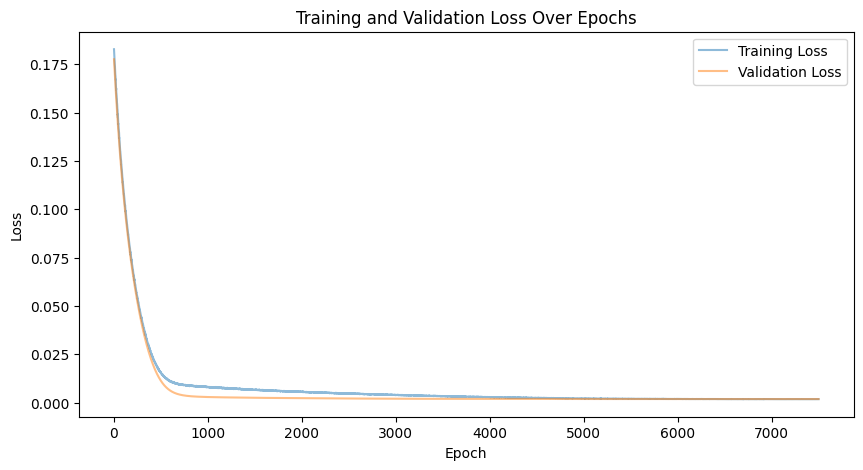

In [68]:
plot_losses(OH_TLosses, OH_VLosses, 7500)

In [75]:
model_two_hidden = MLP_TwoHidden() 
print("\nTraining model with two hidden layers:") 
TH_TLosses, TH_VLosses = train_model(model_two_hidden, X_train, y_train, X_validation, y_validation, epochs=9800, learning_rate=0.00001)


Training model with two hidden layers:
Epoch [10/9800], Loss: 0.00751088, Validation Loss: 0.00476073
Epoch [20/9800], Loss: 0.00756824, Validation Loss: 0.00471763
Epoch [30/9800], Loss: 0.00747543, Validation Loss: 0.00467533
Epoch [40/9800], Loss: 0.00749800, Validation Loss: 0.00463394
Epoch [50/9800], Loss: 0.00737693, Validation Loss: 0.00459357
Epoch [60/9800], Loss: 0.00737752, Validation Loss: 0.00455419
Epoch [70/9800], Loss: 0.00741567, Validation Loss: 0.00451568
Epoch [80/9800], Loss: 0.00717221, Validation Loss: 0.00447795
Epoch [90/9800], Loss: 0.00725112, Validation Loss: 0.00444126
Epoch [100/9800], Loss: 0.00708602, Validation Loss: 0.00440539
Epoch [110/9800], Loss: 0.00711017, Validation Loss: 0.00437045
Epoch [120/9800], Loss: 0.00714307, Validation Loss: 0.00433648
Epoch [130/9800], Loss: 0.00707913, Validation Loss: 0.00430329
Epoch [140/9800], Loss: 0.00705214, Validation Loss: 0.00427096
Epoch [150/9800], Loss: 0.00711726, Validation Loss: 0.00423940
Epoch [16

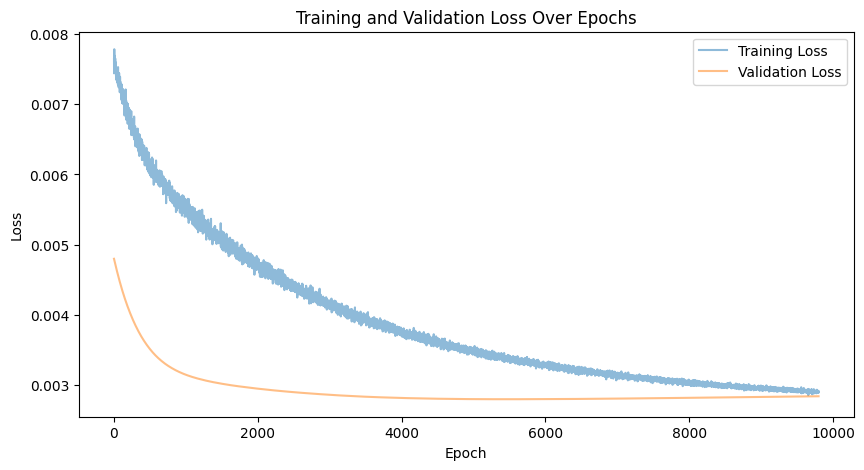

In [76]:
plot_losses(TH_TLosses, TH_VLosses, 9800)

## Results Anallysis

## References

- [Ref1]()
- [Ref2]()
- [Ref3]()